1. [CloudFront](#cloudfront)
2. [CDN](#cdn)
3. [CDN Scenario](#cdn-scenario)
4. [Cloudfront - Origin](#cloudfront---origin)
5. [Cloudfront Process](#cloudfront-process)
6. [Cloudfront S3 as origin](#cloudfront-s3-as-origin)
7. [Cloudfront vs S3 Cross Region Replication](#cloudfront-vs-s3-cross-region-replication)
8. [Setup Cloudfront as S3 Origin](#setup-cloudfront-as-s3-origin)
9. [Caching & Caching Policies](#caching--caching-policies)
10. [Cloudfront cache key](#cloudfront-cache-key)
11. [Caching Policy](#caching-policy)
12. [Caching - HTTP Headers](#caching---http-headers)
13. [Caching - Query Strings](#caching---query-strings)
14. [Origin Request Policy & Cache Policy](#origin-request-policy--cache-policy)
15. [Origin Request Policy](#origin-request-policy)
16. [Cache Invalidation](#cache-invalidation)
17. [Cache Behaviors](#cache-behaviors)
18. [Cache Behavior - Sign In page](#cache-behavior---sign-in-page)
19. [Maximize cache hits by separating static & dynamic content](#maximize-cache-hits-by-separating-static--dynamic-content)
20. [Setup Caching policies, Origin Request Policy, Behaviors and Cache Invalidation](#setup-caching-policies-origin-request-policy-behaviors-and-cache-invalidation)
21. [Cloudfront - EC2 as Origin](#cloudfront---ec2-as-origin)
22. [Cloudfront - Load Balancer as Origin](#cloudfront---load-balancer-as-origin)
23. [Cloudfront - Geo restriction](#cloudfront---geo-restriction)
24. [Setup Geo-restriction](#setup-geo-restriction)
25. [Cloudfront Signed URL / Cookies](#cloudfront-signed-url--cookies)
26. [Cookies vs Signed URL](#cookies-vs-signed-url)
27. [Cloudfront signed URL vs S3 pre-signed URL](#cloudfront-signed-url-vs-s3-pre-signed-url)
28. [Setup Cloudfront signed URL](#setup-cloudfront-signed-url)
29. [Cloudfront Advanced Concept](#cloudfront-advanced-concept)
30. [Cloudfront Real-time logs](#cloudfront-real-time-logs)

#### CloudFront:
- Content Delivery Network
- improves read performance by caching content at edge locations
- improve user experience
- 216 points of presence (edge locations)
- DDOS protection

#### CDN:
- A content delivery network (CDN) is a system of servers that deliver web content to users faster and more efficiently. 
- CDNs are used by many websites and applications, including social media, e-commerce, and video streaming services. 

How does a CDN work? 
- CDNs store copies of web content in data centers around the world.
- When a user requests content, the CDN delivers it from a server that's close to the user.
- This reduces the distance data has to travel, which speeds up page load times.

Why is a CDN important?
- CDNs reduce latency, or the delay in communication between a user and a website. 
- CDNs improve efficiency and performance. 
- CDNs help websites deliver content to users around the world, even when the user is far from the website's server

#### CDN Scenario:
- S3 bucket in Australia
- User from USA or China will connect to the nearest edge location in US or China
- Then the cloudfront (CDN) from the nearest edge location will direct the request to S3 bucket in Australia
- See the picture below

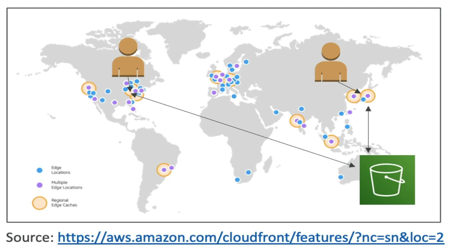

In [25]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/cloudfront.jpeg')
new_image = img.resize((450, 250))
display(new_image)

#### Cloudfront - Origin:

S3 bucket:
- distributing and caching files
- enhanced security with Cloudfront origin access control (OAC)
- origin access control (OAC) is replacing origin access identity (OAI)
- used as ingress (upload files to S3)

Custom Origin:
- Application Load Balancer
- EC2 instance
- S3 website (enable the bucket as static S3 website)
- Any HTTP backend we want

#### Cloudfront Process:
- Client trying to access S3 bucket or HTTP as target
- It first goes to Cloudfront Edge location to check if it has the cache of the result requested by client
- If it has the cache, it will return the cache to the client
- Else, the request goes to the origin and fetches the result and stores as cache into the Cloudfront edge location
- Next time, when a client request the same result, then the cached result will be returned and it wont go to the origin

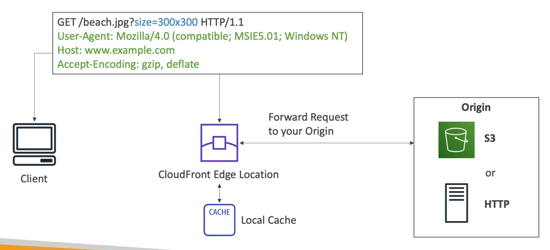

In [26]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/cloudfront1.jpeg')
new_image = img.resize((550, 250))
display(new_image)

#### Cloudfront S3 as origin:

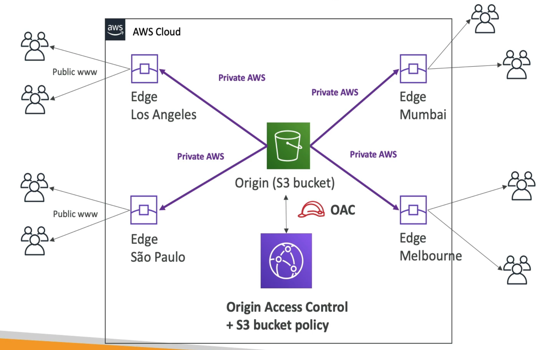

In [27]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/s3origin.jpeg')
new_image = img.resize((550, 350))
display(new_image)

#### Cloudfront vs S3 Cross Region Replication:
- Cloudfront:
    - Global Edge network
    - files are cached for a TTL
    - good for static content

- Cross Region Replication:
    - need to setup separately for each region
    - files are updated near real-time
    - read-only
    - great for dynamic content

#### Setup Cloudfront as S3 Origin:
- Go S3 console and create a bucket
- Upload some sample files (index.html and an image file)
- Now if we try to open the image file uploaded in S3 bucket
    - using object url => access denied because the object (index.html) is not public
    - try using open button on top with pre-signed URL and we see the image not loaded because the image file is not public
- We can access the files in S3 and load them in browser without making the files as public by following the steps below
- Now go to Cloudfront console and create a distribution
    - origin domain
        - S3 buckets
        - Load balancer
        - Media store container
        - Media package container
    - name
    - origin access
        - public 
        - origin access control
            - create
                - name
                - signing behavior
                    - Do not override authorization header
            - After creating the OAC, we need to update the bucket policy
            - Go to S3 bucket
                - Under Permission tab scroll down to Bucket Policy and paste the policy which will be generated after creating the cloudfront distribution
        - origin access identity
        - Add header
    - Enable Origin Shield
        - Its an additional caching layer used to reduce load on origin
    - Cache Behavior
        - Path pattern
        - compress all objects automatically
        - Viewer
            - HTTP and HTTPS
            - Redirect HTTP to HTTPS
            - HTTPS only
        - Restrict Viewer Access
    - Cache Key & Origin Requests
        - Cache Policy and Origin Request Policy
            - Cache Policy
            - Origin Request Policy
        - Legacy Cache Settings
    - Response Header Policy
    - Function Associations (Function types)
        - Viewer Request
        - Viewer Response
        - Origin Request
        - Origin Response
    - WAF (Web Application Firewall)
        - enable 
        - do nto enable
    - Price class
        - use all edge locations
        - NA & Europe
        - NA, Europe, Asia, Africa, MiddleEast
    - Alternate Domain Name (CNAME)
    - Custom SSL
        - choose certificates
    - Supported HTTP version
        - HTTP/2
        - HTTP/3
    - Default root object
        - index.html
    - Standard Logging (gets logs of viewer requests to an Amazon S3 bucket)
    - IPv6
    - Create Distribution

Note:
- Paste the policy into S3 bucket policy in Amazon S3 which is generated after creating the cloudfront distribution
- Even if the policy is destroyed or lost, go to the Origin tab inside the distribution on Cloudfront console
- Again under origin option, click Edit and scroll down to find the "copy policy" option


#### Caching & Caching Policies:
- cache lives on each CloudFront Edge location
- cloudfront identifies each object in the cache using cache key
- maximize cache hit ratio
- can invalidate part of cache using CreateInvalidation API

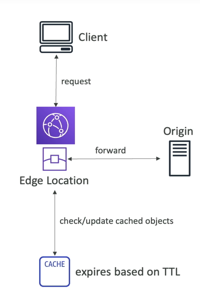

In [28]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/cache.jpeg')
new_image = img.resize((200, 300))
display(new_image)

#### Cloudfront cache key:
- unique identifier for every object in cache
- by default, consist of hostname + resource portion of URL

Note:
- If we have content distributed varies based on user, location, device, etc
- we can use other elements like headers, cookies, query strings to the cache key using CloudFront Cache Policies

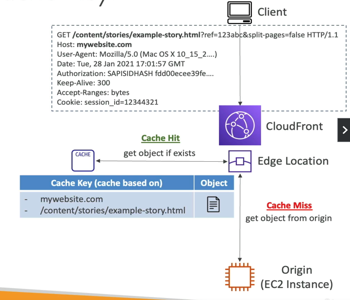

In [29]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/cache2.jpeg')
new_image = img.resize((350, 300))
display(new_image)

#### Caching Policy:
- HTTP Headers: None or Whitelist
- Cookies: None or Whitelist or Include All Except or All
- Query String: None or Whitelist or Include All Except or All

Note:
- Control the TTL (0 secs to 1 year) in caching policy, which is set by the origin using Cache control header, Expires Header, etc
- We can create own cache policy or AWS managed cache policy

#### Caching - HTTP Headers:
None:
- best caching performance
- dont include any headers in cache key except default

Whitelist:
- include only specified headers in cache key along with default as shown in the below image highlighted in blue

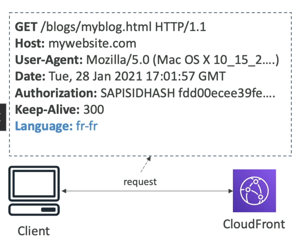

In [30]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/headers.jpeg')
new_image = img.resize((300, 250))
display(new_image)

#### Caching - Query Strings:
None:
- dont include any query strings in cache key

Whitelist:
- only specified query string is included in cache key

Include All Except:
- All query string included except the specified list in cache key

All:
- include all query string in cache key

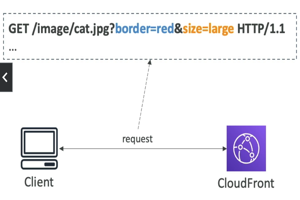

In [31]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/query.jpeg')
new_image = img.resize((300, 200))
display(new_image)

#### Origin Request Policy & Cache Policy:
- Origin Request Policy: from cloudfront to origin
- Cache Policy: when the client sent a request to cloudfront edge location

#### Origin Request Policy:
- Specify the values to include in origin request policy without adding them in cache policy
- do not repeat the same values in both cache policy and origin request policy
- We can include,
    - HTTP headers
    - cookies
    - query strings
- ability to cloudfront HTTP headers and custom headers to a origin request
- We can create own policy or AWS managed policy

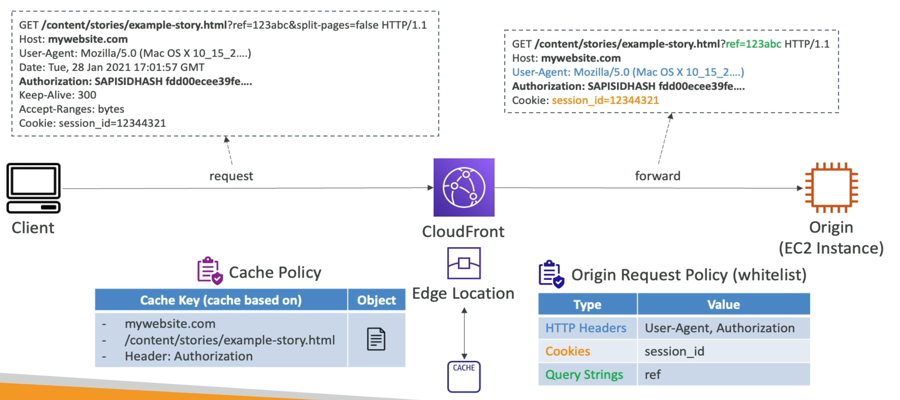

In [32]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/originrequestpolicy.jpeg')
new_image = img.resize((900, 400))
display(new_image)

#### Cache Invalidation:
- If the backend origin is replaced or changed, the cloudfront will not know about it until the TTL is expired and refresh the content
- Cache Invalidation is done to reflect to the latest changes in the origin
- perform force partial or entire cache refresh by Cloudfront Invalidations
- can validate all files using * or specific files inside a folder (/images/*)

In [33]:
from PIL import Image 
from IPython.display import display

img = Image.open('cacheinvalidations.jpeg')
new_image = img.resize((300, 300))
display(new_image)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/joeljoseph26/Documents/Education/Cloud/AWS-Notes/Amazon CloudFront-DNS-Route53-Outpost/cacheinvalidations.jpeg'

Above Process:
- Consider, we have a cloudfront distribution
- We have 2 edge location which contains the cache of index.html and images which if from origin S3 bucket
- Now imagine, we have updated the files in S3 both index.html and images
- Since, we have Cache TTL (for 1 day), even though the files are updated but the CDN will show the outdated files
- To overcome this, we create Cache invalidation to reflect to latest changes in the CDN origins

#### Cache Behaviors:
- configure different setting for an URL pattern
- route to different origins based on content type or path patterns
    - /images/*
    - /api/*

Note:
- The default (/*) cache behavior will be the last behavior to be evaluated

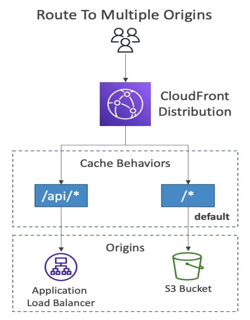

In [ ]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/behaviors.jpeg')
new_image = img.resize((250, 320))
display(new_image)

#### Cache Behavior - Sign In page:

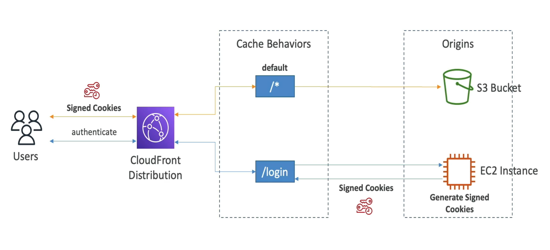

In [ ]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/behaviors2.jpeg')
new_image = img.resize((550, 250))
display(new_image)

#### Maximize cache hits by separating static & dynamic content:

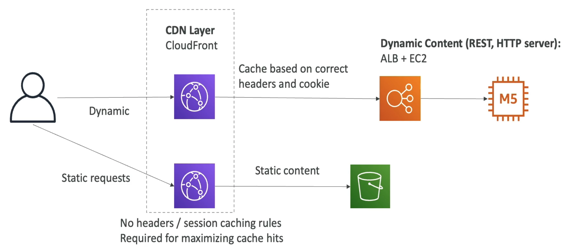

In [ ]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/cachehits.jpeg')
new_image = img.resize((570, 250))
display(new_image)

#### Setup Caching policies, Origin Request Policy, Behaviors and Cache Invalidation:
- We can setup while creating a distribution
- We can setup on the existing distribution on the tabs available inside the distribution

#### Cloudfront - EC2 as Origin:

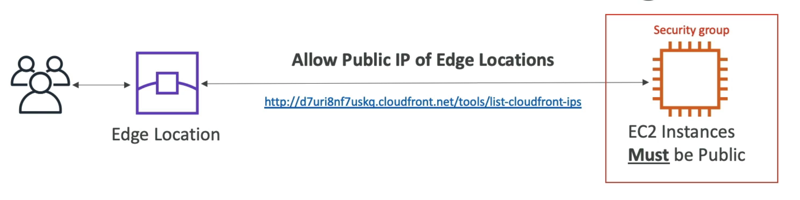

In [34]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/cloudfrontec2.jpeg')
new_image = img.resize((800, 200))
display(new_image)

### Cloudfront - Load Balancer as Origin:

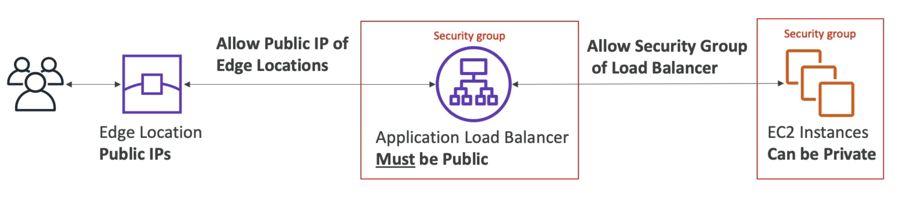

In [35]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/cloudfrontalb.jpeg')
new_image = img.resize((900, 200))
display(new_image)

#### Cloudfront - Geo restriction:
- allowlist 
- blocklist

Usage:
- copyright laws to allow and deny certain contents

#### Setup Geo-restriction:
- Go to the distribution
- Inside distribution, go to security tab and edit the Geo-restriction
    - allowlist
        - countries
    - blocklist
        - countries

#### Cloudfront Signed URL / Cookies:
- when we want to distribute paid content to premium users
- we attach a policy for it
    - URL expiration
    - IP ranges
    - Trusted Signers (AWS account who can create signed URLs)

How long should the URL be valid for:
- Movies/music: few minutes
- private/personal data: years

#### Cookies vs Signed URL:

Signed URL:
- one signed url for each file

Cookie:
- one signed cookie for multiple files

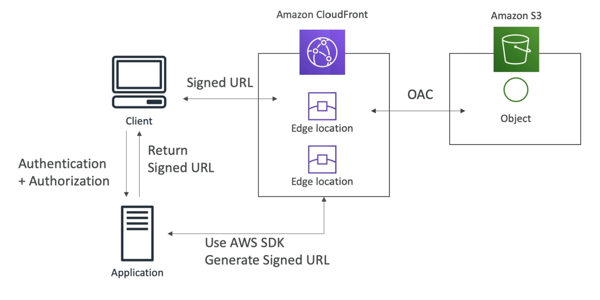

In [36]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/signedurl.jpeg')
new_image = img.resize((600, 300))
display(new_image)

#### Cloudfront signed URL vs S3 pre-signed URL:
Cloudfront signed URL:
- It is not just for S3 but also other origins
- can filter by path, IP, expiration, date
- can leverage caching features

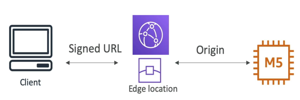

In [37]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/cloudfrontsignedurl.jpeg')
new_image = img.resize((300, 100))
display(new_image)

S3 pre-signed URL:
- Issue a request as the person who pre-signed the URL
- limited lifetime
- uses IAM user key

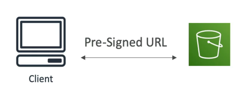

In [38]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/s3signedurl.jpeg')
new_image = img.resize((250, 100))
display(new_image)

#### Setup Cloudfront signed URL:
2 types of signers
- trusted key group
    - can leverage APIs to create and rotate keys
- AWS account that contains CloudFront Key Pair
    - Need to manage keys using root account and the AWS console (not recommended)

- Go to Cloudfront and on the left side pane, we will find key management option
    - public keys
    - key groups
        - create
            - name
            - public key

- Older way, login into AWS account as root account
    - go to security credentials
        - go to cloudfront key pairs

Note:
- generate public/private keys
    - private keys are used in app to sign URLs
    - public keys are used by cloudfront to verify URLs
- Go to https://www.travistidwell.com/jsencrypt/demo to get the keys
    - choose 2048 bit encryption
    - do not lose the private key
        - with private key we can generate the public key

### Cloudfront Advanced Concept:
Pricing:
- price varies based on edge location used
- Price classes:
    - Price class All
    - Price class 200 - avoids most expensive edge location
    - Price class 100 - only uses least expensive edge location

Multiple Origin:
- based on path patterns or content type

Origin Groups:
- to increase high availability and failover
- one primary and one secondary origins

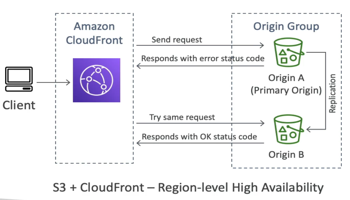

In [39]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/origingroups.jpeg')
new_image = img.resize((350, 200))
display(new_image)

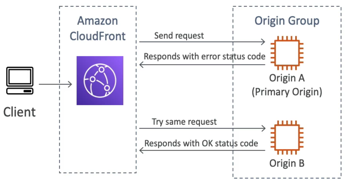

In [40]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/origingroups2.jpeg')
new_image = img.resize((350, 180))
display(new_image)

Field level encryption:
- protect user information
- additional layer of security along with HTTPS
- uses asymmetric encryption
- specific set of fields in POST request to be encrypted (up to 10 fields)

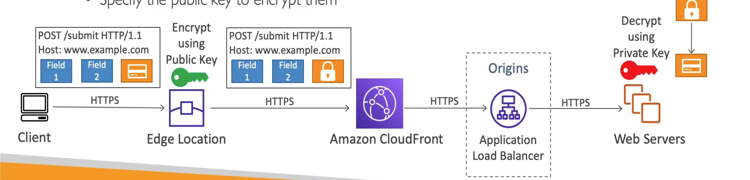

In [41]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/fieldlevel.jpeg')
new_image = img.resize((750, 180))
display(new_image)

#### Cloudfront Real-time logs:
- get real-time requests received by Cloudfront sent to Kinesis Data streams
- monitor, analyze, take action based on logs on cloudfront
- sampling rate: % of requests to be received by Kinesis for auditing
- specific cache behaviors and specific fields

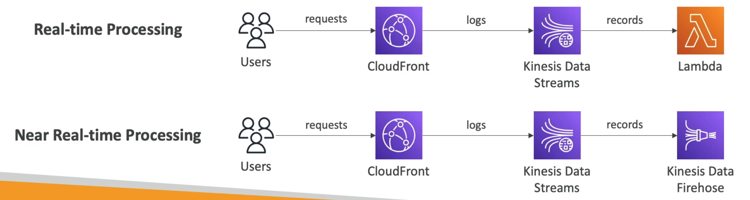

In [42]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/realtime.jpeg')
new_image = img.resize((750, 200))
display(new_image)